<a href="https://colab.research.google.com/github/DhaniAAA/Scrapping-Ulasan/blob/main/Analisis_Sentiment_Lexicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

# File path
LEXICON_FILE_PATH = '/content/lexicon_text.txt'

# Load lexicon from file
def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            word, score = line.strip().split(',')
            lexicon[word] = int(score)
    return lexicon

# Tokenize input text
def tokenize(text):
    return text.lower().split()

# Calculate sentiment score
def calculate_sentiment(text, lexicon):
    words = tokenize(text)
    sentiment_score = 0
    for word in words:
        if word in lexicon:
            sentiment_score += lexicon[word]
    return sentiment_score

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 1:
        return "Positive"
    elif score < -1:
        return "Negative"
    else:
        return "Neutral"

# Main function for sentiment analysis
def sentiment_analysis(text):
    lexicon = load_lexicon(LEXICON_FILE_PATH)
    score = calculate_sentiment(text, lexicon)
    sentiment = classify_sentiment(score)
    return sentiment, score

# Example usage
data = pd.read_csv("/content/preprocessed_komentar.csv")

# Assuming there's a column named 'text' containing the text data
data['Sentiment'], data['Score'] = zip(*data['Content'].apply(sentiment_analysis))

# Print results
print(data[['Content', 'Sentiment', 'Score']])


                                          Content Sentiment  Score
0                 comment on everi mukbang i like   Neutral      0
1                                               i   Neutral      0
2                                           mmmmm   Neutral      0
3                                            we b   Neutral      0
4               gawat fyp mukbang uda bermunculan  Negative     -5
...                                           ...       ...    ...
4485                   tim hau hau snack tray tuh  Negative     -4
4486  tim nya hau snack tray suka banget pokoknya  Negative     -7
4487                       tim hau snack tray mah  Negative     -4
4488               tim hau pastinya tangan terkep  Negative     -3
4489                tim hau snack tray pua banget  Negative     -3

[4490 rows x 3 columns]


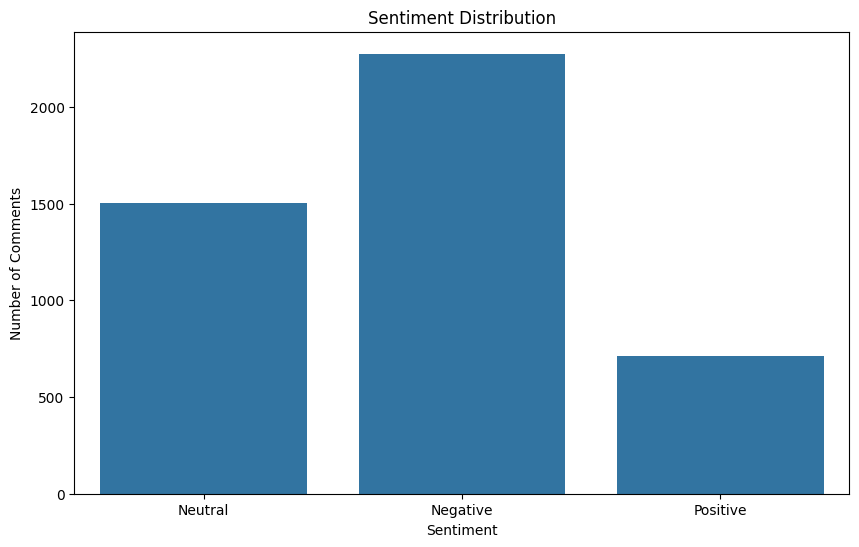

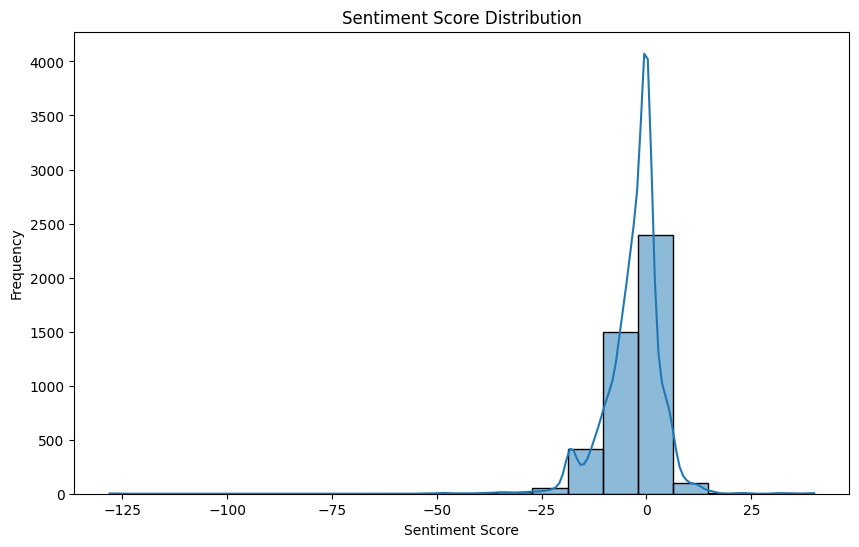

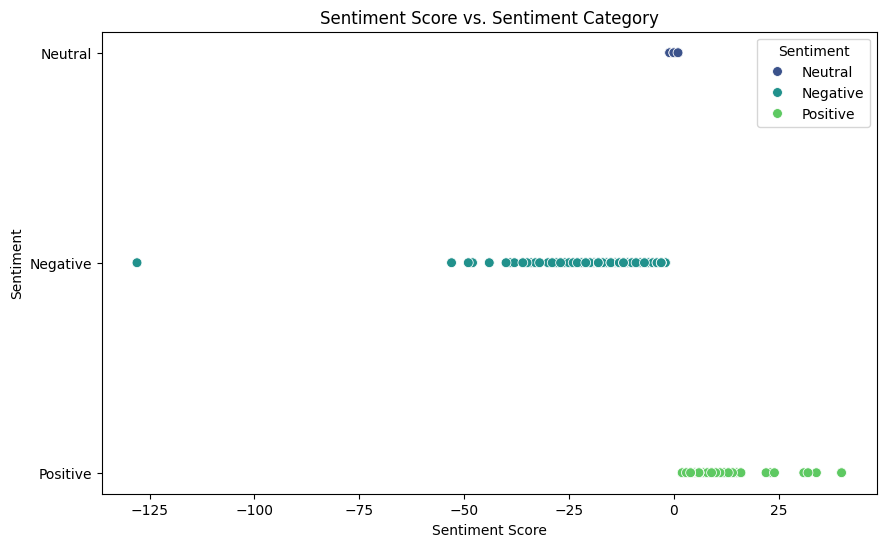

In [16]:
# prompt: buatkan visual untuk sentiment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Example usage (assuming your existing code is correct and data is populated)
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Score'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Additional Visualization:  Sentiment vs. Score (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Sentiment', data=data, hue='Sentiment', palette='viridis', s=50)
plt.title('Sentiment Score vs. Sentiment Category')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment')
plt.show()

In [ ]:
# File path
LEXICON_FILE_PATH = '/content/combined_indonesia_lexicon.txt'

# Load lexicon from file
def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                parts = line.strip().split('\t')
                if len(parts) == 2:
                    word, score = parts
                    lexicon[word] = float(score)
    return lexicon

# Tokenize input text
def tokenize(text):
    return text.lower().split()

# Calculate sentiment score
def calculate_sentiment(text, lexicon):
    words = tokenize(text)
    sentiment_score = 0
    for word in words:
        if word in lexicon:
            sentiment_score += lexicon[word]
    return sentiment_score

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Main function for sentiment analysis
def sentiment_analysis(text):
    lexicon = load_lexicon(LEXICON_FILE_PATH)
    score = calculate_sentiment(text, lexicon)
    sentiment = classify_sentiment(score)
    return sentiment, score

# Example usage
input_text = "barang jlk dijual, tutup ajah tokonya tai :)"
sentiment, score = sentiment_analysis(input_text)
print(f"Sentiment: {sentiment}, Score: {score}")


Sentiment: Negative, Score: -2.024
